In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

<h1 align="center"> Building Salience in Scientific Figures </h1>

<br>

<div align="center">
<font size="+10"> Adam A Miller </font>
<br>
(CIERA/Northwestern/Adler)
<br>
<br>
LSSTC DSFP Session 12
<br>
<br> 
8 Feb 2020</div>

## Preamble

During Session 11, which focused on image processing, implicit in all our discussions was the importance of data processing pipelines. And with good reason, the Vera C. Rubin Observatory will observe $\sim$37 billion sources on $\sim$1000 separate occasions over the course of a decade.

Amassing the largest throng of astronomers and volunteers ever assembled is insufficient to inspect every single Rubin Observatory observation. Thus, pipelines.

As good data scientists, we should all strive to develop software that produces fully reproducible analysis results.

(This is why we spend time learning about version control, continuous integration, software containers, etc.)

And yet, it is important to remember that pipelines can only execute the tasks they are asked to perform.

In late 2007, a stripped-envelope star exploded as the Type Ib supernova 2007uy in the nearby galaxy NGC 2770. Given its proximity X-ray observations were obtained with [Swift](https://www.nasa.gov/mission_pages/swift/main):

<img style="display: block; margin-left: auto; margin-right: auto" src="images/sn2007uy.jpg" width="1000" align="middle">

<div align="right"> <font size="-3">(X-ray on the left, UV/optical on the right. credit: NASA/Swift) </font></div>

The NASA high energy research archive has an easy-to-use pipeline to analyze Swift X-ray images:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Swift_pipeline.png" width="600" align="middle">

<div align="right"> <font size="-3">(X-ray on the left, UV/optical on the right. credit: NASA/HEASARC) </font></div>

The NASA tools can extract an X-ray light curve of SN 2007uy just by hitting "go" – in which case you'd miss this:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/sn2008D.jpg" width="1000" align="middle">

<div align="right"> <font size="-3">(X-ray on the left, UV/optical on the right. credit: NASA/Swift) </font></div>

SN 2008D was imaged literally seconds after the star exploded; this never would have happened had Edo Berger and Alicia Soderberg not looked at the Swift data. 

SN 2008D is one of the most important SN discoveries from the past two decades.

Pipelines are wonderful, necessary, and often life savers, but...

**there is no replacement for looking at the data**.

or, in other words,

those that *worry about the data*, **look at the data**.

The most vexing problem of my career was solved by looking at the data:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/SDSS_LRGs.png" width="800" align="middle">

<div align="right"> <font size="-3">(credit: SDSS) </font></div>

## Introduction

<br>
Session 12 focuses on data visualization, and, informally attempts to answer: what is the best way to communicate (or discover) the most important features within a data set?
<br>

(The remainder of this talk will primarily focus on visualization as a tool for communication, but as the preamble shows visualization is also a very powerful tool for discovery which will be discussed in more detail later this week.)

As scientists we primarily communicate via three mediums: 

 $~~~~$text (e.g., papers)
 
 $~~~~$speaking (e.g., talks)
  
 $~~~~$visualization (e.g., figures and slides)

As human beings we communicate via stories. 

When writing a paper or giving a talk you are certainly telling a story (with a beginning, middle, and end). If you are creating a visualization you should do the same.

(Telling stories with data is an idea we will repeatedly visit this week, so I won't dwell on this topic here.)

**Break Out Problem 1**

What is the story of this figure?

<img style="display: block; margin-left: auto; margin-right: auto" src="images/badColCol.jpg" width="600" align="middle">

<div align="right"> <font size="-3">(credit: Miller et al. 2015, ApJ, 798, 122) </font></div>

(*the* story of this figure is that its author is not qualified to give this talk...)

My eyes! They burn!

That visualization has many problems. Aside from the terrible construction (`jet` colormap, overlapping symbols, no visual boundaries...), it completely fails to tell any story whatsoever.

(seriously, what was I thinking...)

Another lesson – captions matter. 

Captions are a critical part of telling the story of a visualization.

I issue a **challenge** to each of you today: build visualizations that do not require captions. It is difficult but not impossible. 

(Captions also tell stories! We will discuss more later this week, but think about whether the "default" method of writing captions – red line = this, gray dots = that – is truly in service of your story.)

But what if my figure is "just" a histogram?

If it doesn't tell a story, it shouldn't be a figure. Means and medians can be summarized in a table; distributions can be described in text (multimodal, long tails, etc.)

## Effective Communication

To build effective visualizations, ask yourself these questions:

$~~~~~~~~$ What is the fundamental purpose of this figure?

$~~~~~~~~$ What newspaper headline would accompany this figure?

$~~~~~~~~$ Will other people "steal" this figure for their own talks?

Consider the following:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/badFeatures.png" width="600" align="middle">

<div align="right"> <font size="-3">(credit: Miller et al. 2015, ApJ, 798, 122) </font></div>

*Purpose* – Rorschach test?

*Headline* – "Local Astronomer Fails to Communicate Anything of Particular Relevance"

*Steal it?* – yes... if it was printed on paper and the person needed to start a fire

Now consider this: 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/MadauPlot.png" width="600" align="middle">

<div align="right"> <font size="-3">(credit: Madau 1997 AIPC, 393, 481 ) </font></div>

*Purpose* – Show cosmic star formation as a function of time.

*Headline* – "Universe Forms Fewer and Fewer Stars With Every Passing Year"

*Steal it?* – Yes!!! Literally, 10,000 times yes.

(I could not go more than 2 weeks in grad school without seeing some version of this figure.)

This figure is now known as the infamous "Madau plot." 

I find myself marveling at its simplicity. (I cannot think of any way to make this more "effective.")

<img style="display: block; margin-left: auto; margin-right: auto" src="images/MadauPlot.png" width="600" align="middle">

<div align="right"> <font size="-3">(credit: Madau 1997 AIPC, 393, 481 ) </font></div>

**Challenge #2** that I issue to each of you today: build visualizations that are so effective other astronomers must steal them from you for their talks. 

(If we're being honest, none of us will win a Nobel prize, but one of us might, one day, have a figure named after us #DSFPsquadgoals)

## Why Visualization?

Data and analysis are worthless if the results of the analysis cannot be communicated. 

To borrow a trope - "a picture is worth a thousand words."

Of all the topics in the DSFP, visualization is exceptionally difficult to teach because there is no "right answer."

Every person brings their own personal history and perspective to every visualization. 

**Break Out Problem 2** 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/upside_down.png" width="600" align="middle">

<div align="right"> <font size="-3">(data credit: Latest Supernovae + Transient Name Server, courtesy of G. Hosseinzadeh) </font></div>

**Break Out Problem 2**

Is the number of transients increasing or decreasing with time?

You probably said decreasing (but maybe not), either way, this question should not require a lot of thought. 

Here's the same figure (but with more ink):

<img style="display: block; margin-left: auto; margin-right: auto" src="images/better_labels.png" width="600" align="middle">

<div align="right"> <font size="-3">(data credit: Latest Supernovae + Transient Name Server, courtesy of G. Hosseinzadeh) </font></div>

As you can see, I have intentionally subverted expectations. With the axes labeled properly, it is not too difficult to see what is happening here. Nevertheless we all naturally expect bar charts to point "up" for positive numbers.

Use a viewer's expectations to your advantage by reducing their cognitive load.

(In all things, subverting expectations has its place, but for visualization you must be absolutely sure that you have your audience's attention long enough for them to understand that you are subverting expectation)

(Allow me a quick aside)

In addition to someone else's personal perspective, which is truly impossible to ever "know", visualizations can have a physical perspective. 

Physical perspective must be considered in the presentation of multidimensional data sets.

**Break Out Problem 3**

What is this?

<img style="display: block; margin-left: auto; margin-right: auto" src="images/bad_3d.png" width="450" align="middle">

<div align="right"> <font size="-3">(data credit: hidden for now, see next slide) </font></div>

The answer is actually quite obvious, but it is nearly impossible to decipher from this visualization.

Consider this presentation of the exact same data:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/number8.png" width="450" align="middle">

<div align="right"> <font size="-3">(data credit: MNIST) </font></div>

As is now clear, the data are a pixelated scan of a handwritten number "8". While this is a data set in 3 dimensions, "3D" representations totally obscure their simple-to-interpret and familiar form. 

The second representation is a good example where "less is more" – visualization tools make it easy to "add" (features, color, dimensions, motion, etc) despite the fact that additional bells and whistles increase the cognitive load on the audience.

A good maxim - avoid high ink to information ratios.

"3D" representations should be limited to data sets that are *physically* three dimensional. 

This almost always means no "3D" plots allowed (however, as astronomers everything we study is in "space" meaning 3D is appropriate in some situations).

As the above example shows, even for very very large dimensional datasets "3D" representations most typically must be presented via 2D media, in which case superior alternatives to 3D can always be found.

I will not belabor this point as we have an entire lecture on this topic later this week.

(end of aside)

While we cannot perfectly know or address a person's individual perspective, there is a great deal that we know about human cognition (e.g., relative distances are easier to infer than relative color differences). 

We can leverage this knowledge to maximum effect when building visualizations. 

## Salience

Today we have emphasized simplicity and efficiency as key tenets in communicating with visualizations. 

I now want to introduce the idea of salience – good visualizations facilitate the immediate identification of the most important features in a figure. This happens when the features are salient.

(Webster's dictionary defines salient as – something that projects outward or upward from its surroundings. In other words, the most important part of a visualization should "jump off the page.")

It is here that we can leverage basic human cognition and the principles of **similarity**, **proximity**, **connection**, and **enclosure** to rapidly communicate the most salient features of a figure.

**Similarity** 

objects with similar appearance are naturally grouped together

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Miller_16abc_lightcurve.jpg" width="600" align="middle">

<div align="right"> <font size="-3">(credit: Miller et al. 2018, ApJ, 852, 100) </font></div>

(UV observations from Swift are grouped via hexagonal symbols and shades of blue (semantically "hot"), whereas NIR observations are grouped via pentagonal symbols and shades of red (semantically "cool"). Negative points for weak visual boundaries – hexagons and pentagons are very similar. ALL THE NEGATIVE POINTS for making a figure that literally communicates nothing – the supernova got brighter then it got fainter – no purpose, no headline, definitely never ever ever will be stolen)

**Proximity** 

objects with small separations are naturally grouped together

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Miller_PTFsg.jpg" width="950" align="middle">

<div align="right"> <font size="-3">(modified from: Miller et al. 2017, AJ, 153, 73) </font></div>

(bonus points for vertical proximity linking sources of similar brightness. Negative points for the original version of this figure using an identical spacing between all of the images)

**Connection** 

objects that are connected are naturally grouped together

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Miller_16fnm_connection.png" width="600" align="middle">

<div align="right"> <font size="-3">(credit: Miller et al. 2017, ApJ, 848, 59) </font></div>

(bonus points for the strong visual boundaries [i.e., star symbol vs. circles] separating iPTF 16fnm, the subject of the paper, from the other supernovae in consideration. Negative points for the lack of visual boundaries separating red and green)

**Enclosure** 

objects that are enclosed are naturally grouped together

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Miller_RCB_selection.jpg" width="670" align="middle">

<div align="right"> <font size="-3">(credit: Miller et al.  2012, ApJ, 755, 98) </font></div>

(bonus points for highlighting the most important sources in the figure – the newly discovered [R Coronae Borealis stars](https://en.wikipedia.org/wiki/R_Coronae_Borealis_variable) – with the special star symbol. Negative points for weak visual boundaries and an overly complex "story")

When building salience, 
*things that stand out are easy to find*: 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Miller_19yvq_luminosity.jpg" width="390" align="middle">

<div align="right"> <font size="-3">(credit: Miller et al. 2020, ApJ, 898, 56) </font></div>

## Conclusions

$~~~~$ Visualization is essential for the data science tool box

$~~~~$ Science communication hinges on effective visualizations 

$~~~~$ Tell a story; try to build things people will steal

$~~~~$ Focus on the salient features in every figure you create

## Appendix

Make an "upside down" histogram to mess with viewers expectations.

In [2]:
sndat = pd.read_csv('supernova_discoveries.txt', delim_whitespace=True)

<IPython.core.display.Javascript object>


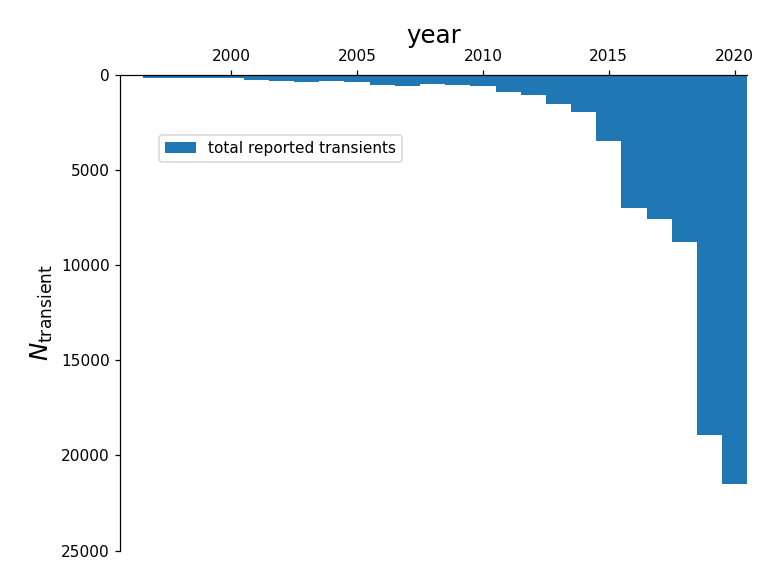

In [3]:
fig, ax = plt.subplots()
ax.bar(sndat.year, -1.*sndat.discoveries, 
       width=1, label='total reported transients')
ax.set_xlim(1995.6,2020.5)

ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# ax.spines['left'].set_linewidth(0)
ax.set_xlabel('year', fontsize=16)
ax.set_ylabel('$N_\mathrm{transient}$', fontsize=16)


# misleading version
ax.set_yticklabels([])
fig.tight_layout()
fig.savefig("./images/upside_down.png")


ax.set_yticks([-25000,-20000,-15000,-10000,-5000, 0])
ax.set_yticklabels([25000,20000,15000,10000,5000, 0])
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.spines['top'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0)
ax.legend(loc=3, bbox_to_anchor=(0.05,0.8))
fig.tight_layout()
fig.savefig("./images/better_labels.png")

Make an (unnecessary) 3d histogram.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


<IPython.core.display.Javascript object>


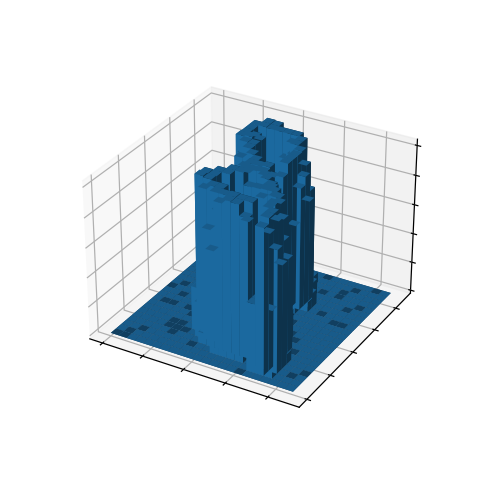

In [5]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')


_xx, _yy = np.meshgrid(np.arange(22), np.arange(22))
x, y = _xx.ravel(), _yy.ravel()

top = X[41].reshape(28,28)[3:-3,3:-3].flatten()/100
bottom = np.zeros_like(top)
width = depth = 1




ax.bar3d(x, y, bottom, width, depth, top, shade=True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

fig.savefig('./images/bad_3d.png')

<IPython.core.display.Javascript object>


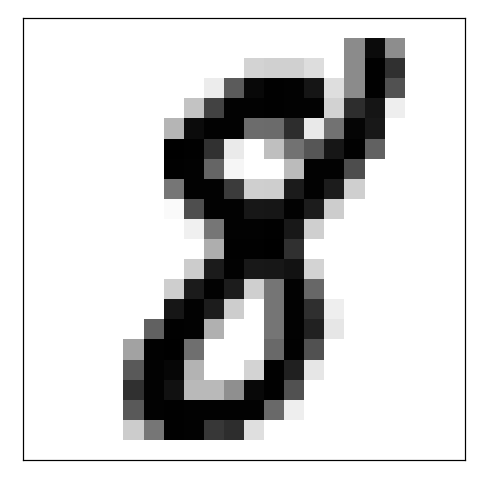

In [6]:
fig, ax = plt.subplots(figsize=(4,4))

ax.imshow(X[41].reshape(28,28)[3:-3,3:-3], 
          cmap='binary')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig('./images/number8.png')